In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
raw_car = pd.read_csv('Auto Analysis Ready.csv')

In [3]:
raw_car.head(5)

,count,avgPrice,vehicleType,year,power,mileage,brand,transmission,Damage
0,1,10.000,2,1991,238.0,150.000,0,0,0
1,2,1.750,2,1992,90.0,137.500,0,0,0
2,1,5.890,2,1993,238.0,150.000,0,0,0
3,6,4.198,2,1994,164.8,135.000,0,0,0
4,6,2.707,2,1995,139.0,136.667,0,0,0


In [4]:
data_type = raw_car.dtypes
data_type

count             int64
avgPrice        float64
vehicleType       int64
year              int64
power           float64
mileage         float64
brand             int64
transmission      int64
Damage            int64
dtype: object

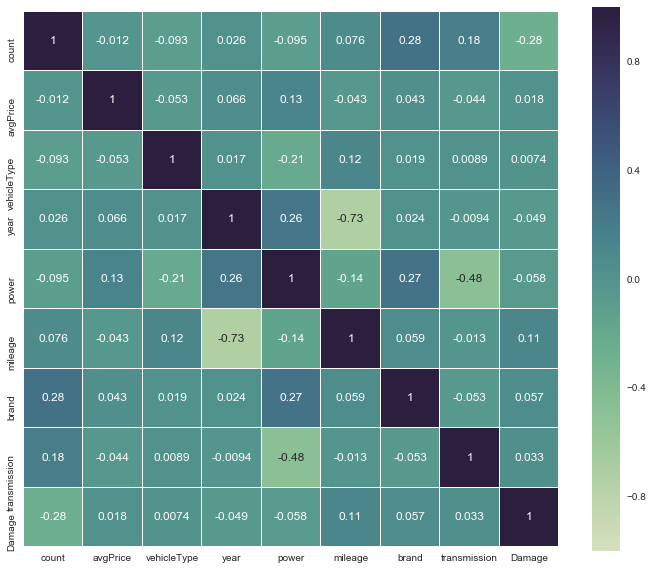

In [5]:
corr = raw_car.corr() 
plt.figure(figsize=(12, 10))
cmapp = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

sns.heatmap(corr, 
            cmap=cmapp, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

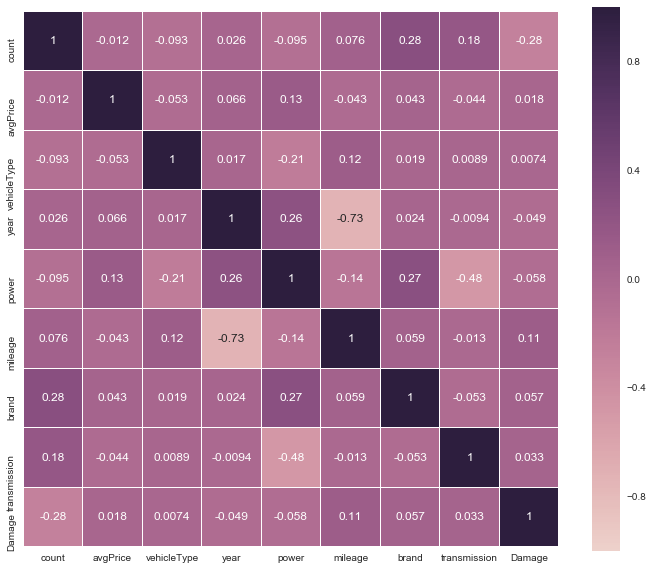

In [6]:
corr = raw_car.corr() 
plt.figure(figsize=(12, 10))
cmapp = sns.cubehelix_palette(8,as_cmap=True)

sns.heatmap(corr, 
            cmap=cmapp, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True) #mask= corr < 0.95);

In [9]:
raw_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 9 columns):
count           955 non-null int64
avgPrice        955 non-null float64
vehicleType     955 non-null int64
year            955 non-null int64
power           955 non-null float64
mileage         955 non-null float64
brand           955 non-null int64
transmission    955 non-null int64
Damage          955 non-null int64
dtypes: float64(3), int64(6)
memory usage: 67.2 KB


In [10]:
raw_car.describe()

,count,avgPrice,vehicleType,year,power,mileage,brand,transmission,Damage
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,264.257592,12.904051,5.937173,2003.429319,143.895602,116.201730,0.547644,0.528796,0.463874
std,684.309054,147.734001,2.776857,7.301674,46.829221,39.759829,0.497986,0.499432,0.498955
min,1.000000,0.001000,2.000000,1991.000000,16.000000,5.000000,0.000000,0.000000,0.000000
25%,8.000000,1.867500,4.000000,1997.000000,113.250000,103.503000,0.000000,0.000000,0.000000
50%,36.000000,4.501000,6.000000,2003.000000,136.000000,135.000000,1.000000,1.000000,0.000000
75%,165.500000,10.286000,8.000000,2010.000000,164.900000,143.333000,1.000000,1.000000,1.000000
max,6596.000000,4557.694000,10.000000,2018.000000,513.700000,150.000000,1.000000,1.000000,1.000000


In [12]:
raw_car.year.median()

2003.0